In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%config InlineBackend.figure_format='retina'
import pandas as pd


# Load data

In [11]:
window = 3

t2m_era5 = xr.open_mfdataset(f'/data0/samuelb/como2024/ERA5_resampled/detrended/t2m_balkans_{window}daymean_startjan1.nc').__xarray_dataarray_variable__#var167
sm_era5 = xr.open_mfdataset(f'/data0/samuelb/como2024/ERA5_resampled/detrended/sm_balkans_{window}daymean_startjan1.nc').__xarray_dataarray_variable__#var39
z500_era5 = xr.open_mfdataset(f'/data0/samuelb/como2024/ERA5_resampled/detrended/Z500_global_{window}daymean_startjan1.nc').__xarray_dataarray_variable__#var129


In [15]:
t2m_era5 = t2m_era5.where(t2m_era5.time.dt.month.isin([6,7,8]),drop=True)
sm_era5 = sm_era5.where(sm_era5.time.dt.month.isin([6,7,8]),drop=True)


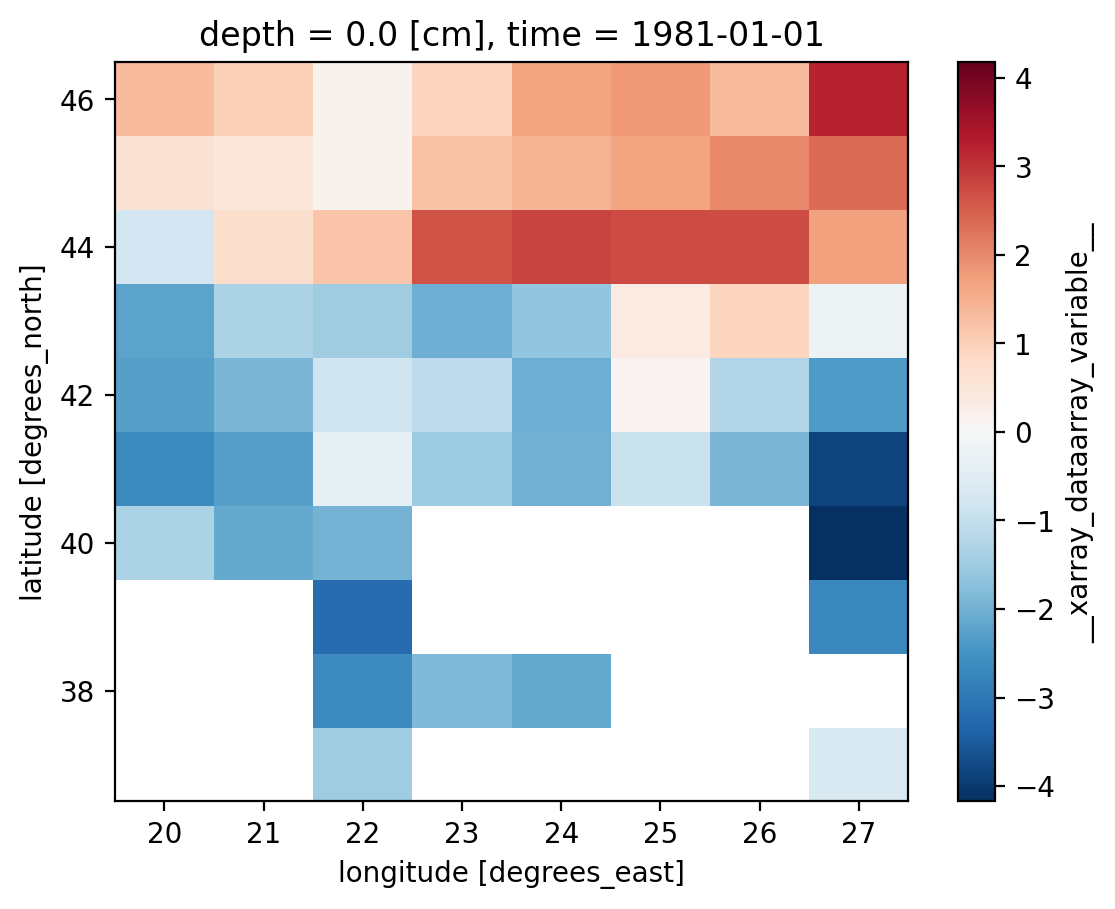

In [12]:
t2m_era5.isel(time=0).plot()


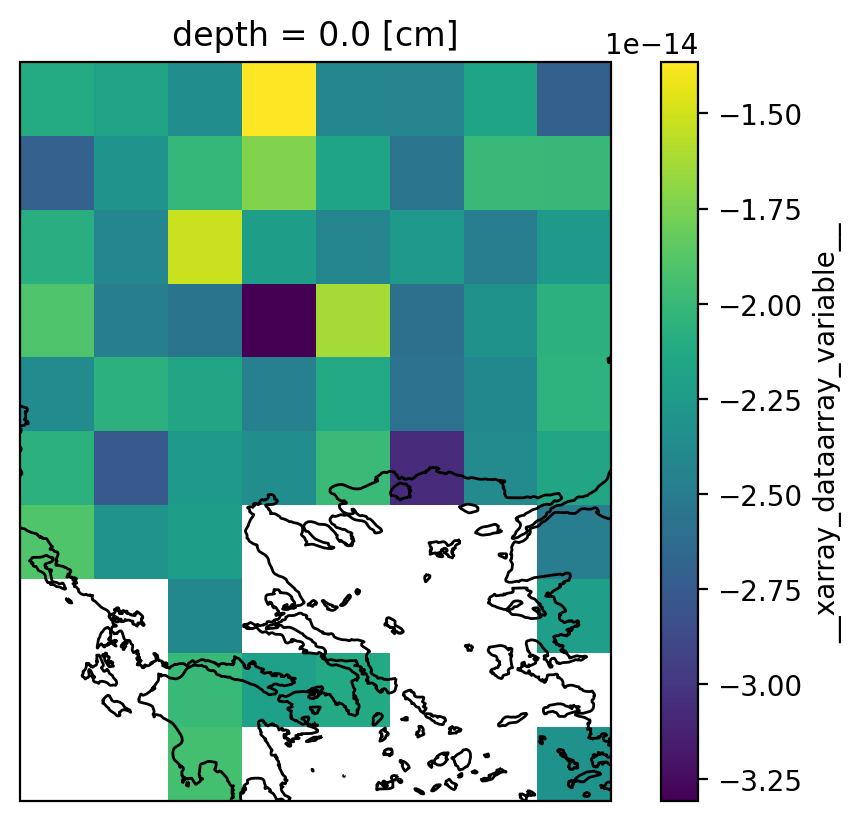

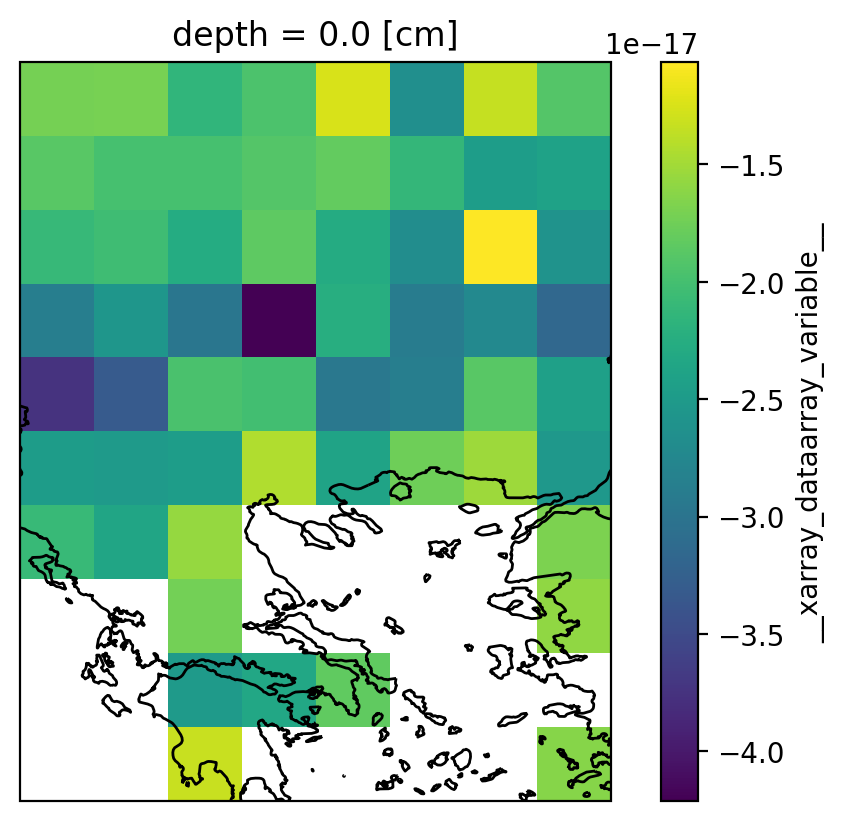

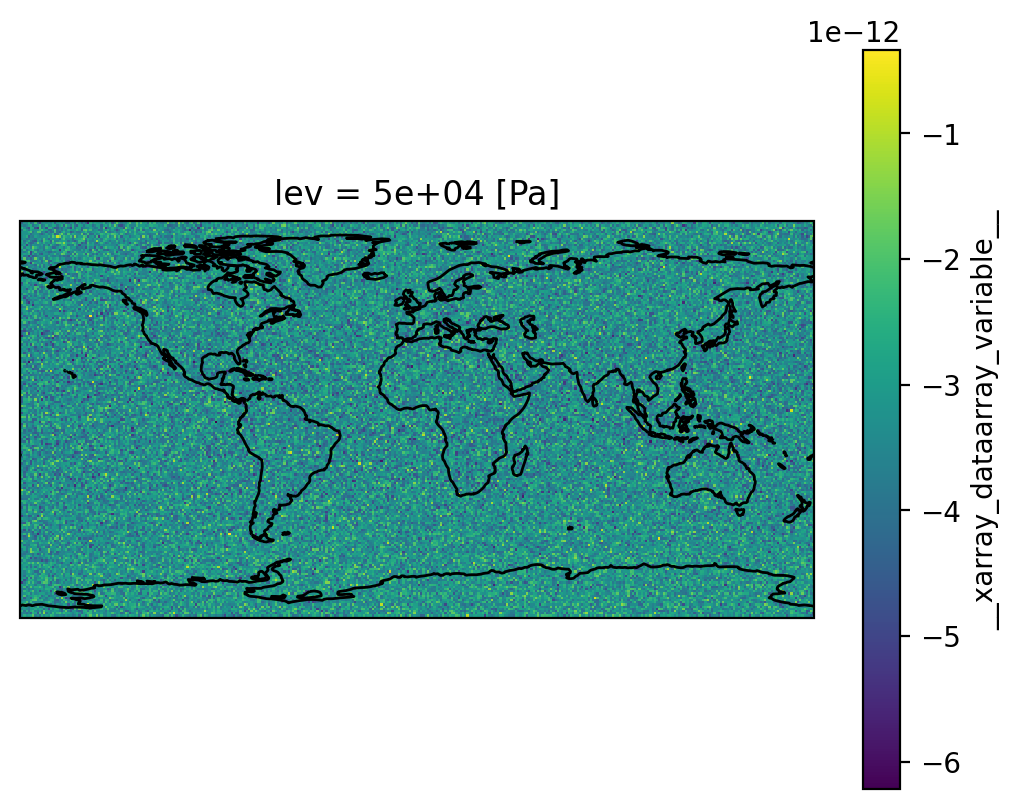

In [13]:
t2m_era5.mean('time').plot(ax=plt.figure().add_subplot(projection=ccrs.PlateCarree())); plt.gca().coastlines(); plt.show()
sm_era5.mean('time').plot(ax=plt.figure().add_subplot(projection=ccrs.PlateCarree())); plt.gca().coastlines(); plt.show()
z500_era5.mean('time').plot(ax=plt.figure().add_subplot(projection=ccrs.PlateCarree())); plt.gca().coastlines(); plt.show()


# Composite Z500 on t2m and sm extremes


/home/samuelb/.conda/envs/como2024/lib/python3.9/site-packages/xarray/core/indexing.py:1621: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


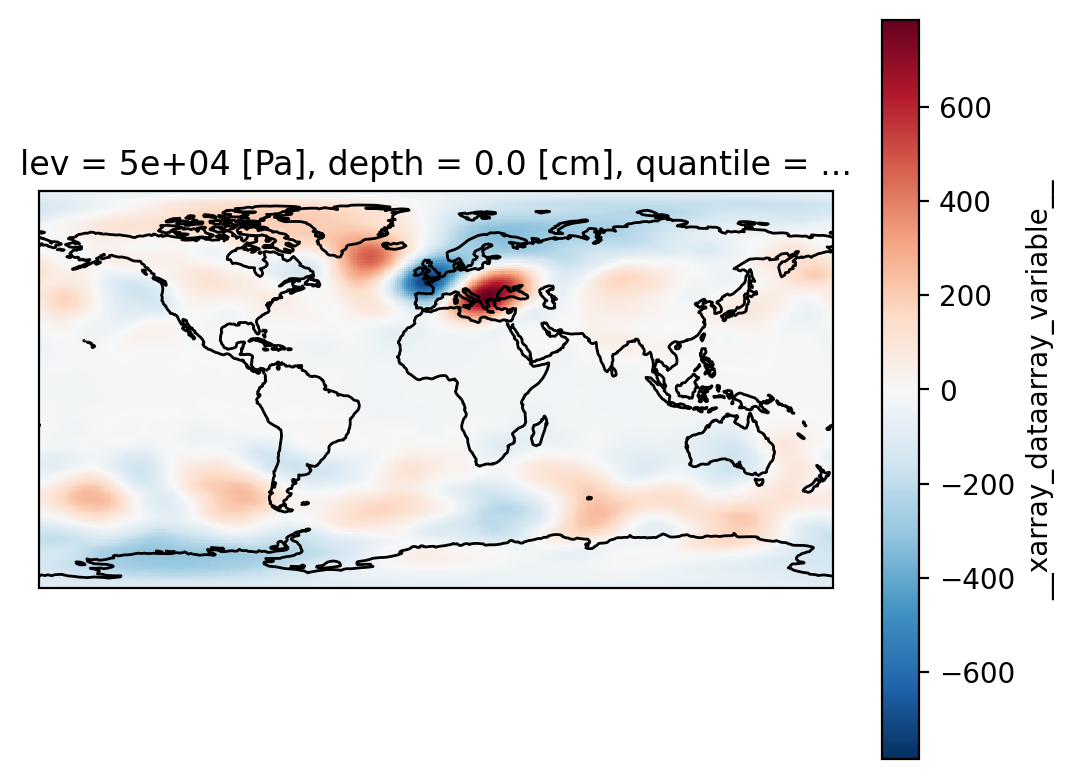

/home/samuelb/.conda/envs/como2024/lib/python3.9/site-packages/xarray/core/indexing.py:1621: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


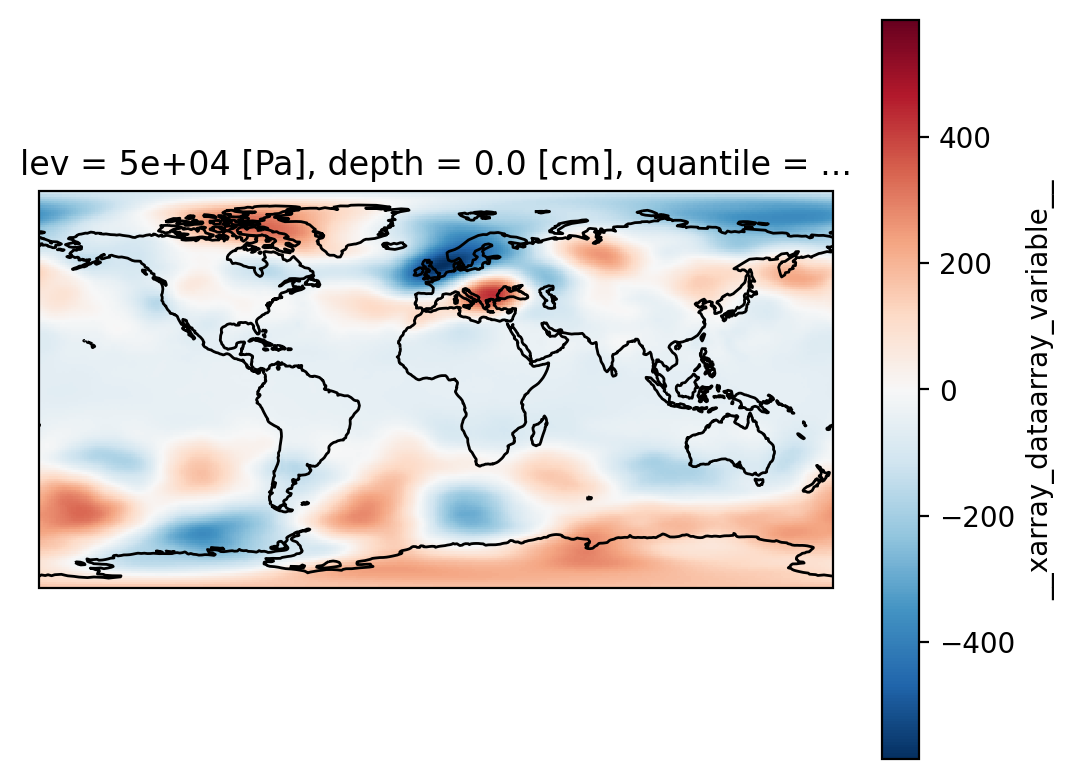

In [21]:
z500_era5.where(t2m_era5.mean(('lat','lon'))>t2m_era5.mean(('lat','lon')).quantile(.95,'time')).mean('time').plot(ax=plt.figure().add_subplot(projection=ccrs.PlateCarree())); plt.gca().coastlines(); plt.show()

z500_era5.where(sm_era5.mean(('lat','lon'))<sm_era5.mean(('lat','lon')).quantile(.05,'time')).mean('time').plot(ax=plt.figure().add_subplot(projection=ccrs.PlateCarree())); plt.gca().coastlines(); plt.show()


/home/samuelb/.conda/envs/como2024/lib/python3.9/site-packages/xarray/core/indexing.py:1621: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


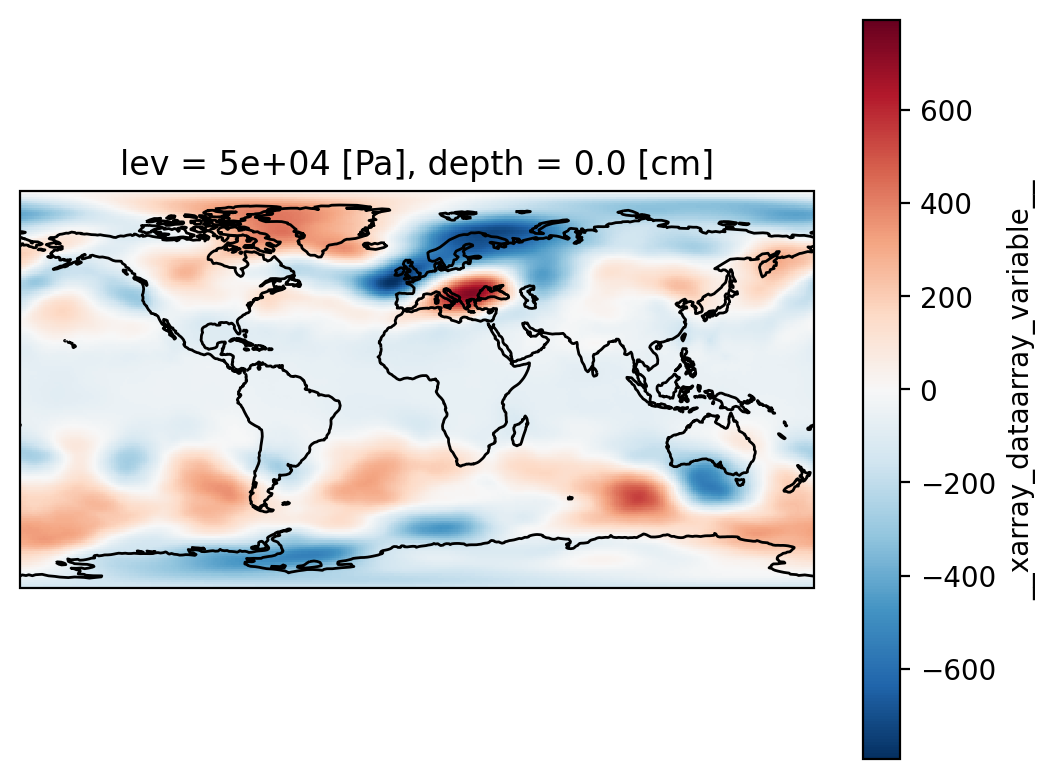

In [20]:
z500_era5.where(
    (t2m_era5.mean(('lat','lon'))>t2m_era5.mean(('lat','lon')).quantile(.95,'time')) & 
    (sm_era5.mean(('lat','lon'))<sm_era5.mean(('lat','lon')).quantile(.05,'time'))
).mean('time').plot(ax=plt.figure().add_subplot(projection=ccrs.PlateCarree())); plt.gca().coastlines(); plt.show()
